# Predicting house prices:
## Regression example
### Deep Learning with Keras pg. 85
#### The Boston Housing Price Dataset

In [1]:
# Step 01: Load dataset
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets)= boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(train_targets[0:9])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6]


In [2]:
# Step 02: Prepare the data (normalizing)
mean= train_data.mean(axis=0)
train_data -= mean
std= train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [3]:
# Step 03: Building the network
from keras import models
from keras import layers

def build_model():
    model= models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [4]:
# Step 04: Validation using K-fold validation
import numpy as np

k=4
num_val_samples= len(train_data) //k
num_epochs= 100
all_scores= []

for i in range(k):
    print('Processing fold #: ',i)
    val_data= train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets= train_targets[i* num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data= np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets= np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model= build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print('Mean Square Error (MSE): ', val_mse)
print('Mean Absolute Error (MAE): ', val_mae)
print('Final scores: ', all_scores)
# print('Average Final Score: ', mean(all_scores))

Processing fold #:  0
Processing fold #:  1
Processing fold #:  2
Processing fold #:  3
Mean Square Error (MSE):  11.194929122924805
Mean Absolute Error (MAE):  2.3361802101135254
Final scores:  [2.050787925720215, 2.1629812717437744, 2.6031527519226074, 2.3361802101135254]


In [5]:
# Step 05: Saving the validation logs at each fold
num_epochs= 500
all_mae_histories= []
for i in range(k):
    print('Processing fold #', i)
    val_data= train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets= train_targets[i*num_val_samples: (i + 1)*num_val_samples]
    
    partial_train_data= np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets= np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model= build_model()
    history= model.fit(partial_train_data, partial_train_targets, validation_data= (val_data, val_targets), epochs= num_epochs, batch_size= 1, verbose= 0)
    mae_history= history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [6]:
# Step 06:Building the history of successive mean K-fold validation score
average_mae_history= [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

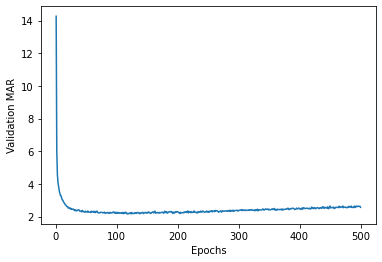

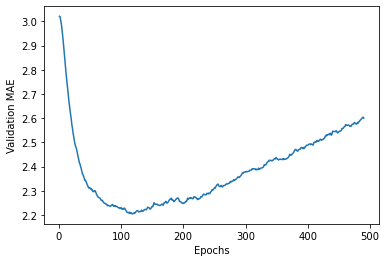

In [7]:
# Step 07: Plotting validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAR')
plt.show()

def smooth_curve(points, factor= 0.9):
    smoothed_points= []
    for point in points:
        if smoothed_points:
            previous= smoothed_points[-1]
            smoothed_points.append(previous* factor + point* (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoothed_mae_history= smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smoothed_mae_history) +1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [8]:
# Step 08: Training the Model

model= build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score= model.evaluate(test_data, test_targets)
print('Mean Absolute Error of the test: ', test_mae_score)

4/4 [==============================] - 0s 0s/step - loss: 20.1704 - mae: 2.8921
Mean Absolute Error of the test:  2.8920814990997314
